In [3]:
from experiment import load_CIFAR10H, simulate_humans
from combiner import *
from test_Yhm import test_Yhm

In [4]:
human_counts, model_probs, y_true = load_CIFAR10H('cnn_data')
accuracies = [0.89, 0.47, 0.41, 0.45, 0.62, 0.37, 0.45]
y_h = simulate_humans(human_counts, y_true, accuracy_list=accuracies)

y_h_tr, y_h_te, model_probs_tr, model_probs_te, y_true_tr, y_true_te = train_test_split(
                    y_h, model_probs, y_true, test_size=0.999)

In [5]:
combiner = MAPOracleCombiner()

combiner.fit(model_probs_tr, y_h_tr, y_true_tr,7)

In [6]:
import csv

def compute_cf_diff():
    diff_list = []
    count_list = []
    average_diff = []
    for i in range(len(model_probs)):
        hcm_list = combiner.confusion_matrix
        _, h_labels = test_Yhm(hcm_list, model_probs[i])
        diff = []
        ct = 0
        for h in range(len(accuracies)):
            diff.append(hcm_list[h][h_labels[h]][y_true[i]] - hcm_list[h][y_h[i][h]][y_true[i]])
            if hcm_list[h][h_labels[h]][y_true[i]] - hcm_list[h][y_h[i][h]][y_true[i]] < 0:
                ct+=1
        if ct>0:
            average_diff.append([sum(d for d in diff if d<0)/ct])
        else:
            average_diff.append([0])
        diff_list.append(diff)
        count_list.append([ct])
    with open('diff.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(diff_list)
    with open('count.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(count_list)
    with open('avg.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(average_diff)
compute_cf_diff()


In [7]:
print(len(combiner.confusion_matrix))

7


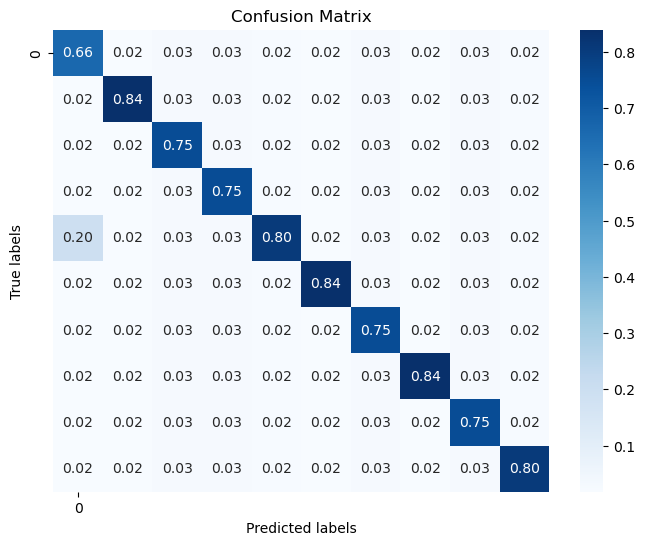

Precision: [0.76042494 0.80126832 0.79093886 0.79093886 0.6775178  0.80126832
 0.79093886 0.80126832 0.79093886 0.79746835]
Recall: [0.66071429 0.83928571 0.75       0.75       0.80434783 0.83928571
 0.75       0.83928571 0.75       0.80434783]
F1 Score: [0.70707164 0.81983652 0.76992561 0.76992561 0.73550525 0.81983652
 0.76992561 0.81983652 0.76992561 0.80089332]
Accuracy: 0.7787267080745338


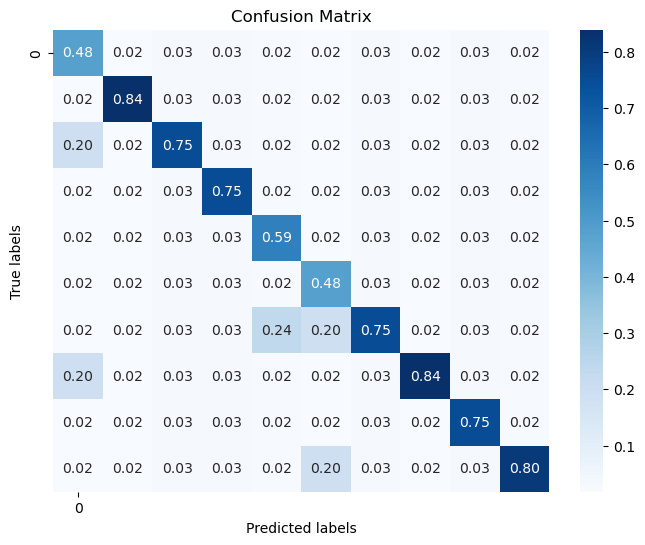

Precision: [0.76042494 0.80126832 0.79093886 0.79093886 0.6775178  0.80126832
 0.79093886 0.80126832 0.79093886 0.79746835]
Recall: [0.66071429 0.83928571 0.75       0.75       0.80434783 0.83928571
 0.75       0.83928571 0.75       0.80434783]
F1 Score: [0.70707164 0.81983652 0.76992561 0.76992561 0.73550525 0.81983652
 0.76992561 0.81983652 0.76992561 0.80089332]
Accuracy: 0.7787267080745338


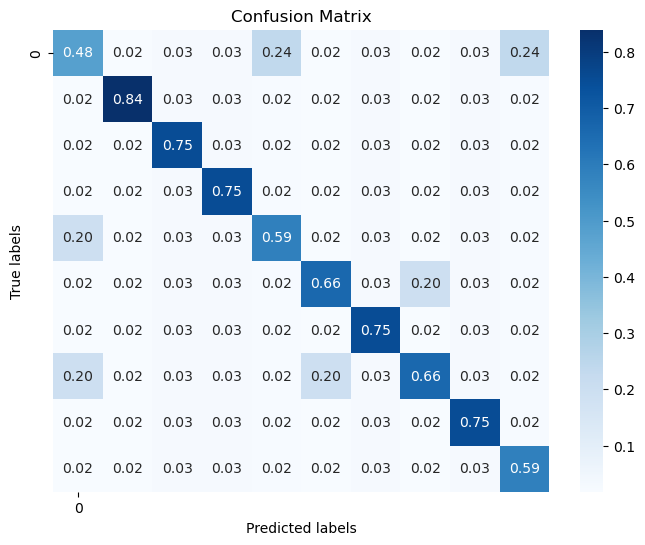

Precision: [0.76042494 0.80126832 0.79093886 0.79093886 0.6775178  0.80126832
 0.79093886 0.80126832 0.79093886 0.79746835]
Recall: [0.66071429 0.83928571 0.75       0.75       0.80434783 0.83928571
 0.75       0.83928571 0.75       0.80434783]
F1 Score: [0.70707164 0.81983652 0.76992561 0.76992561 0.73550525 0.81983652
 0.76992561 0.81983652 0.76992561 0.80089332]
Accuracy: 0.7787267080745338


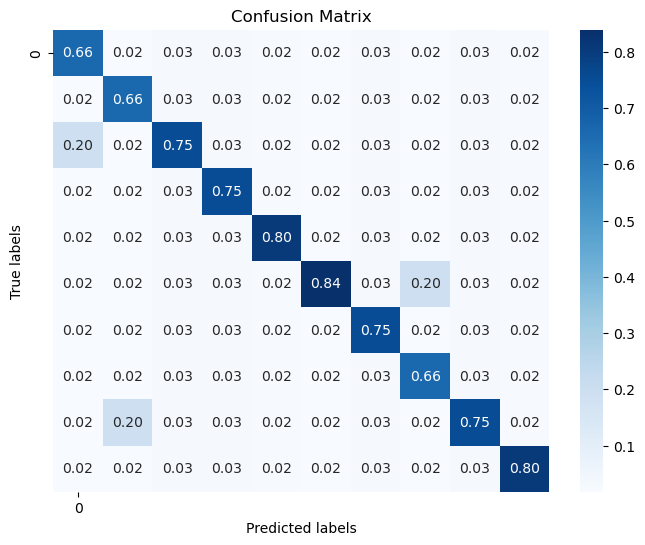

Precision: [0.76042494 0.80126832 0.79093886 0.79093886 0.6775178  0.80126832
 0.79093886 0.80126832 0.79093886 0.79746835]
Recall: [0.66071429 0.83928571 0.75       0.75       0.80434783 0.83928571
 0.75       0.83928571 0.75       0.80434783]
F1 Score: [0.70707164 0.81983652 0.76992561 0.76992561 0.73550525 0.81983652
 0.76992561 0.81983652 0.76992561 0.80089332]
Accuracy: 0.7787267080745338


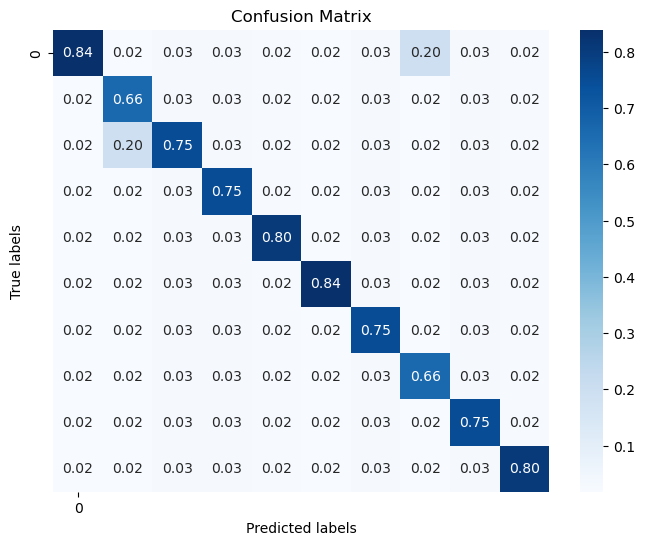

Precision: [0.76042494 0.80126832 0.79093886 0.79093886 0.6775178  0.80126832
 0.79093886 0.80126832 0.79093886 0.79746835]
Recall: [0.66071429 0.83928571 0.75       0.75       0.80434783 0.83928571
 0.75       0.83928571 0.75       0.80434783]
F1 Score: [0.70707164 0.81983652 0.76992561 0.76992561 0.73550525 0.81983652
 0.76992561 0.81983652 0.76992561 0.80089332]
Accuracy: 0.7787267080745338
[[0.66071429 0.01785714 0.02777778 0.02777778 0.02173913 0.01785714
  0.02777778 0.01785714 0.02777778 0.02173913]
 [0.01785714 0.83928571 0.02777778 0.02777778 0.02173913 0.01785714
  0.02777778 0.01785714 0.02777778 0.02173913]
 [0.01785714 0.01785714 0.75       0.02777778 0.02173913 0.01785714
  0.02777778 0.01785714 0.02777778 0.02173913]
 [0.01785714 0.01785714 0.02777778 0.75       0.02173913 0.01785714
  0.02777778 0.01785714 0.02777778 0.02173913]
 [0.19642857 0.01785714 0.02777778 0.02777778 0.80434783 0.01785714
  0.02777778 0.01785714 0.02777778 0.02173913]
 [0.01785714 0.01785714 0.02

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, labels=None):
    """
    Plot the confusion matrix.

    Parameters:
        confusion_matrix (np.ndarray): Confusion matrix.
        labels (array-like, optional): List of labels for confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def precision(confusion_matrix):
    """
    Compute precision.

    Parameters:
        confusion_matrix (np.ndarray): Confusion matrix.

    Returns:
        float: Precision.
    """
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy_score = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1_score)
    print('Accuracy:', accuracy_score)
    # return np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    

plot_confusion_matrix(combiner.confusion_matrix[0], labels=10)
precision(combiner.confusion_matrix[0])
plot_confusion_matrix(combiner.confusion_matrix[1], labels=10)
precision(combiner.confusion_matrix[0])
plot_confusion_matrix(combiner.confusion_matrix[2], labels=10)
precision(combiner.confusion_matrix[0])
plot_confusion_matrix(combiner.confusion_matrix[3], labels=10)
precision(combiner.confusion_matrix[0])
plot_confusion_matrix(combiner.confusion_matrix[4], labels=10)
precision(combiner.confusion_matrix[0])

print(combiner.confusion_matrix[0])


